1. Package import

In [41]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. make array and initilize value

In [42]:
datanum= 300

epoch =1500

# array for graph
train_loss_Array=np.zeros((epoch,1))
test_loss_Array=np.zeros((epoch,1))
W_Array=np.zeros((epoch,4))

x_epoch=np.arange(epoch)

# dot for gradient decent
train_X =np.zeros((datanum,4))
train_Y =np.zeros((datanum,1))

test_X =np.zeros((datanum,4))
test_Y =np.zeros((datanum,1))




3. read train and test data

In [43]:
import csv

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        train_X[ct][0]= 1
        train_X[ct][1]=i[0]
        train_X[ct][2]=i[1]
        train_X[ct][3]=i[2]
        train_Y[ct][0]=i[3]
        ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0 
    for i in reader:
        print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        test_X[ct][0]=1
        test_X[ct][1]=i[0]
        test_X[ct][2]=i[1]
        test_X[ct][3]=i[2]
        test_Y[ct][0]=i[3]
        ct += 1

        

[ 0 ] x = 0.27354771453665605 , y =  -8.932101598046074 , z =  18.70868394492699 , h =  73.57882491359598
[ 1 ] x = 5.403327323126673 , y =  4.782976500936417 , z =  -18.76220985503919 , h =  -56.41043333872962
[ 2 ] x = 0.029941312523676267 , y =  -3.2459156984821025 , z =  6.9324982114247895 , h =  52.39076824816363
[ 3 ] x = 3.047974457680872 , y =  0.7152107112924928 , z =  -1.9654187170206976 , h =  -6.936295282007531
[ 4 ] x = 1.3020743188547064 , y =  -5.871807382211632 , z =  -15.702181352019878 , h =  -34.99701707942456
[ 5 ] x = 0.48067768765626884 , y =  -2.9117619875044713 , z =  -2.3631235358529112 , h =  -19.85473503546304
[ 6 ] x = 1.6315020736136816 , y =  9.399052248888598 , z =  2.47547991106324 , h =  4.6693089029172725
[ 7 ] x = 6.373997103111523 , y =  16.58421457152967 , z =  17.896253239300936 , h =  20.327296910572635
[ 8 ] x = 7.003140610383589 , y =  17.425389177900183 , z =  -11.921952696244727 , h =  -96.11724036189486
[ 9 ] x = 11.816393974825985 , y =  10.

[ 157 ] x = 161.1007712283418 , y =  153.44220930992515 , z =  137.8598441837711 , h =  397.1720694466215
[ 158 ] x = 159.58621877235026 , y =  167.31665515133483 , z =  162.36603641627516 , h =  471.8431809810393
[ 159 ] x = 158.58213955113743 , y =  162.80489760117698 , z =  169.23589206518176 , h =  510.20168595436724
[ 160 ] x = 164.19203199912195 , y =  152.90185656476947 , z =  177.16387674391285 , h =  552.4386469120598
[ 161 ] x = 160.63657594934833 , y =  167.51218733595033 , z =  162.87305009026798 , h =  486.2688688850274
[ 162 ] x = 162.01443874346018 , y =  170.46986362944955 , z =  173.60770856929724 , h =  505.51944152637054
[ 163 ] x = 163.04992279896888 , y =  171.03764068423504 , z =  161.53143787653332 , h =  484.1653282921865
[ 164 ] x = 163.4987483061723 , y =  160.20558186644823 , z =  161.99927058095014 , h =  501.75332058306844
[ 165 ] x = 160.90995275641794 , y =  174.35944239332557 , z =  168.76000542346907 , h =  505.47370888221866
[ 166 ] x = 166.01710286763

[ 293 ] x = 294.1658206586587 , y =  292.5239573116402 , z =  297.4484117457901 , h =  903.453751529857
[ 294 ] x = 291.6490833916905 , y =  301.68037106179605 , z =  306.1402852770876 , h =  925.1884698968564
[ 295 ] x = 290.5613654415526 , y =  290.77154361680334 , z =  283.6485191015881 , h =  820.0715425837167
[ 296 ] x = 292.91607270332946 , y =  294.14757888069676 , z =  288.51165733123 , h =  861.0432159484673
[ 297 ] x = 298.9556754965833 , y =  303.55221406623366 , z =  306.4204221024845 , h =  905.9716447705238
[ 298 ] x = 297.5919997484549 , y =  292.6007906506864 , z =  293.1803156535612 , h =  884.3339032016695
[ 299 ] x = 301.7826308193181 , y =  308.98693489682927 , z =  308.1620472675689 , h =  925.0197483442477
[ 0 ] x = -1.7888936425100344 , y =  -2.7179270467236405 , z =  -4.425694592598011 , h =  -14.055817919454796
[ 1 ] x = 2.9581743142333643 , y =  4.515505437560417 , z =  6.644435366127567 , h =  20.504904903622798
[ 2 ] x = -0.5694896788138601 , y =  10.0962455

[ 130 ] x = 129.61484538882942 , y =  136.2361225816763 , z =  130.67400296147048 , h =  379.83861207135874
[ 131 ] x = 131.6266264341685 , y =  128.29281311873652 , z =  116.39669357544605 , h =  340.62777449847965
[ 132 ] x = 129.2006472569312 , y =  135.22143641977092 , z =  136.7592160613394 , h =  405.79463866274693
[ 133 ] x = 135.03214498853745 , y =  133.67598622246408 , z =  152.68488559837007 , h =  478.41971493708957
[ 134 ] x = 130.51697330026064 , y =  137.24994478663197 , z =  122.8426436068808 , h =  347.3876581545199
[ 135 ] x = 136.2141102704701 , y =  131.02299788382587 , z =  118.75352615274196 , h =  349.1822191137862
[ 136 ] x = 136.68521203663403 , y =  133.4077932367852 , z =  150.18699104310227 , h =  470.6175897354727
[ 137 ] x = 136.71139112913954 , y =  145.13366490567861 , z =  128.02725958336038 , h =  358.5530996512238
[ 138 ] x = 141.7312822112208 , y =  136.10913235475573 , z =  141.84065346017388 , h =  436.87563134240486
[ 139 ] x = 136.12244773454356 

[ 266 ] x = 269.4514432026095 , y =  267.19137080151245 , z =  274.7614952159209 , h =  834.1146824632681
[ 267 ] x = 270.45150335246007 , y =  274.2513505932234 , z =  280.92909503661974 , h =  845.6651823124923
[ 268 ] x = 268.01053377031 , y =  268.3829137280125 , z =  263.8289729368079 , h =  786.5605980615164
[ 269 ] x = 272.9965033916598 , y =  267.9566678105691 , z =  261.6111439123498 , h =  783.5277434199209
[ 270 ] x = 270.62154417035754 , y =  274.2294577418965 , z =  289.6494820843702 , h =  880.7605570240454
[ 271 ] x = 271.6773740056074 , y =  270.05857128059256 , z =  252.47187769108737 , h =  741.4477422087718
[ 272 ] x = 267.6934405664607 , y =  280.9960209628213 , z =  259.86103310957157 , h =  745.1455310791043
[ 273 ] x = 271.445275675128 , y =  277.868864315571 , z =  263.9286648319303 , h =  771.4222063717073
[ 274 ] x = 273.7573617442654 , y =  268.508763933496 , z =  293.38719012314067 , h =  910.288594369836
[ 275 ] x = 279.5540020374506 , y =  270.934656907089

4. Processing Gradient decent(training)

In [54]:
lr=0.001 #learning Rate

W=np.random.randn(4)*0.1
W=W.reshape(4,1)

W_=np.zeros((4,1))



train_X=train_X.reshape(4,300)
train_Y=train_Y.reshape(1,300)

test_X=test_X.reshape(4,300)
test_Y=test_Y.reshape(1,300)

print(train_X.shape)
print(train_Y.shape)

print(W.shape)
print(W_.shape)

print(W.T.shape)

for iter in range(epoch):
    
    
    #calculate the train loss
    loss=(np.dot(W.T,train_X)-train_Y)*(np.dot(W.T,train_X)-train_Y) 
    loss=1/(2*datanum)*np.sum(loss)
    train_loss_Array[iter]=loss
    
    print("train")
    print(loss)


    
    #calculate the train loss
    loss=(np.dot(W.T,test_X))*(np.dot(W.T,test_X)-test_Y) 
    loss=1/(2*datanum)*np.sum(loss)
    test_loss_Array[iter]=loss
    
    print("test")
    print(loss)
    
    W_[0] = 1/datanum*np.sum(W*train_X-train_Y)*train_X[0]
    W_[1] = 1/datanum*np.sum(W*train_X-train_Y)*train_X[1]
    W_[2] = 1/datanum*np.sum(W*train_X-train_Y)*train_X[2]
    W_[3] = 1/datanum*np.sum(W*train_X-train_Y)*train_X[3]

    # update the parameters
    W = W - W_ * lr 
    W_Array[iter] = W
 

(4, 300)
(1, 300)
(4, 1)
(4, 1)
(1, 4)
train
147393.93977560775
test
5874.973218804472


ValueError: could not broadcast input array from shape (300) into shape (1)

5. plotting the input data

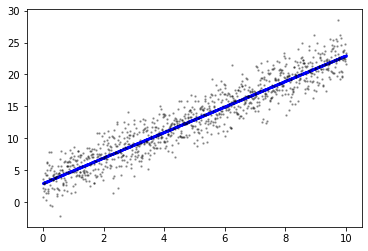

In [119]:
plt.scatter(x_,y_ ,c="b",s=2)
plt.scatter(x_,noise_y ,c="black",s=2,alpha=0.5 )#
plt.show()

6. plotting the output results

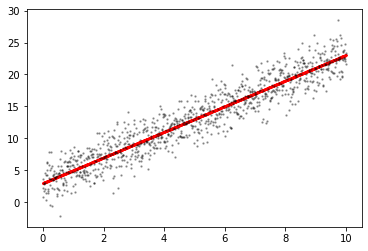

In [120]:
plt.scatter(x_,new_y ,c="r",s=2)
plt.scatter(x_,noise_y ,c="black",s=2,alpha=0.5 )
plt.show()

7. plotting the energy values

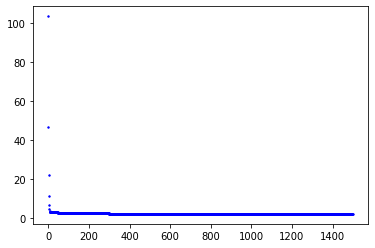

In [121]:
plt.scatter(x_epoch,loss_Array ,c="b",s=2)#loss 
plt.show()

8. plotting the model parameters

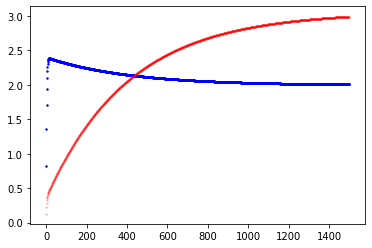

In [122]:
plt.scatter(x_epoch,W_Array ,c="b",s=2)#theta 1
plt.scatter(x_epoch,B_Array ,c="r",s=2,alpha=0.2 )#theta 0
plt.show()